## Importing Libraries

In [1]:
#importing proccessing & visualization libraries
import numpy as np
import pandas as pd
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

#importing algorithm & data split feature
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# importing evaluation metrices for model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Problem Statement & Data

## Data Gathering

In [2]:
df= pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape
rows = df.shape[0]
coloums= df.shape[1]

In [4]:
df.columns,df.index

(Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'),
 RangeIndex(start=0, stop=150, step=1))

In [5]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.Id.nunique()

150

In [9]:
df.drop(['Id'],axis=1,inplace=True)

In [10]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df[df.duplicated(keep=False)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
df[df.duplicated(keep='first')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [13]:
df[df.duplicated(keep='last')]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica


In [14]:
df.Species.nunique()

3

In [15]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [17]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [19]:
df['Species'].dtypes

dtype('int64')

In [20]:
df['Species']=df['Species'].astype('float64')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [21]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species          float64
dtype: object

In [23]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

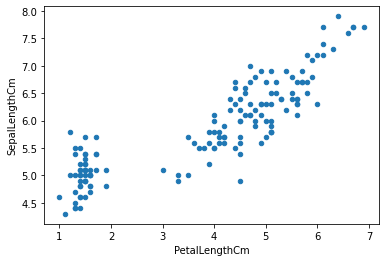

In [24]:
df.plot(x='PetalLengthCm',y='SepalLengthCm',kind='scatter')

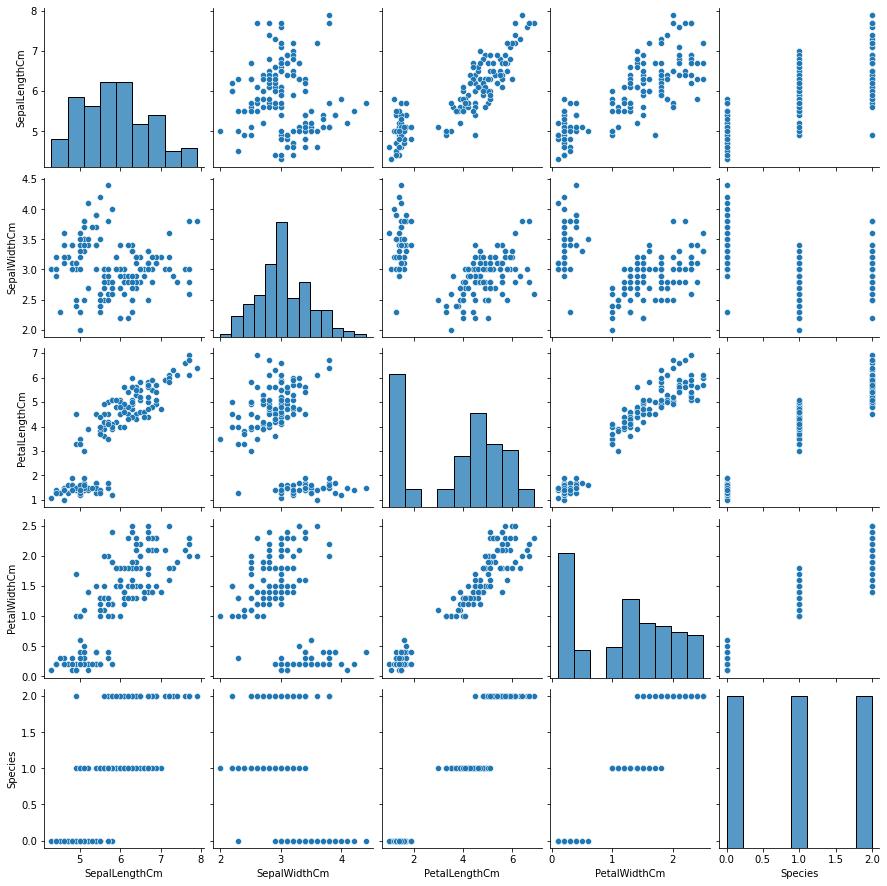

In [25]:
sns.pairplot(df)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

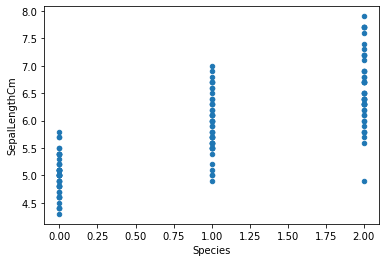

In [26]:
df.plot(x='Species',y='SepalLengthCm',kind='scatter')

In [27]:
corr= df.corr()

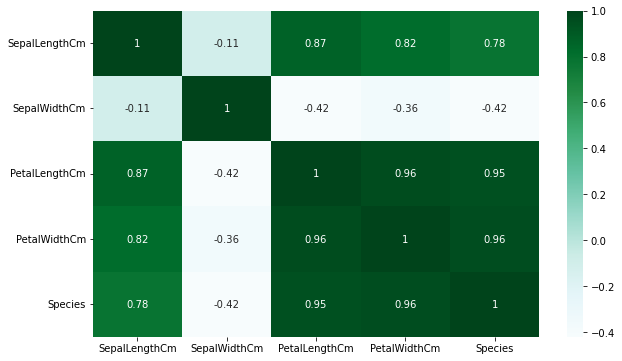

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='BuGn')
plt.savefig('Correlation matix.jpg')


In [29]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [30]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
x = df.drop('SepalLengthCm',axis=1)
y = df['SepalLengthCm']
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

## Building a Model/ Training a model

### Splitting the data into training & testing data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [34]:
x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,3.0,4.6,1.4,1.0
135,3.0,6.1,2.3,2.0
69,2.5,3.9,1.1,1.0
128,2.8,5.6,2.1,2.0
114,2.8,5.1,2.4,2.0
...,...,...,...,...
133,2.8,5.1,1.5,2.0
137,3.1,5.5,1.8,2.0
72,2.5,4.9,1.5,1.0
140,3.1,5.6,2.4,2.0


In [35]:
y_train

91     6.1
135    7.7
69     5.6
128    6.4
114    5.8
      ... 
133    6.3
137    6.4
72     6.3
140    6.7
37     4.9
Name: SepalLengthCm, Length: 120, dtype: float64

### Create an instance of the model

In [36]:
lr_model=LinearRegression()

### training the model

In [37]:
lr_model.fit(x_train,y_train)   

LinearRegression()

### Predicting the output variable

In [38]:
y_pred=lr_model.predict(x_test)
y_pred

array([5.09192877, 4.93149358, 6.25720518, 5.02467945, 7.72619147,
       6.58803407, 6.08751945, 5.47306316, 4.97011483, 6.65064945,
       5.96358461, 5.36185069, 6.79865775, 6.40915979, 6.23704035,
       4.7172364 , 5.78471033, 6.2944135 , 4.90639933, 4.63294359,
       6.12188157, 6.2944135 , 6.62170856, 4.84227135, 7.13895033,
       5.93666494, 5.37526068, 5.18297641, 6.48950629, 5.84732571])

### MSE

In [40]:
mse = mean_squared_error(y_test,y_pred)
mse

0.15781531046414649

### RMSE

In [41]:
np.sqrt(mse)

0.3972597518804875

### MAE

In [42]:
error = sum(|xi-xp|)/n

SyntaxError: invalid syntax (Temp/ipykernel_13988/223451125.py, line 1)

In [43]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.3232781241570913

### R2 score

In [44]:
r2_value=r2_score(y_test,y_pred)
r2_value

0.7588110183264586

### Adjusted R2 score

In [47]:
Adj_R2 = 1 - (((1-r2_value) * (rows - 1)) / (rows - (coloums-1) - 1))
Adj_R2

0.7504364009072384

### checking the magnitude of coefficients

<AxesSubplot:title={'center':'Modal Coefficients'}>

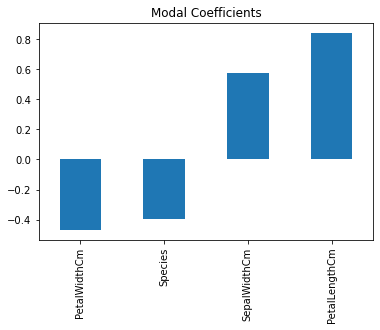

In [50]:
predictors = x_train.columns

coef = pd.Series(lr_model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## Ridge/ L2 Regularization

r2:  0.8199284860276714


<AxesSubplot:title={'center':'Modal Coefficients with 0.05'}>

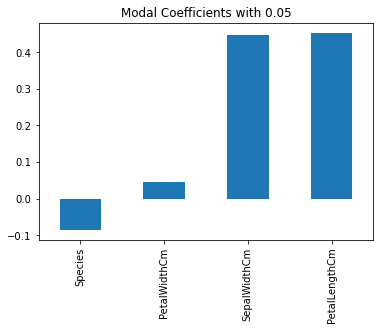

In [78]:
 # for alpha = 0.05
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

print("r2: ",r2_score(y_test,pred))

predictors = x_train.columns

coef = pd.Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 0.05')

r2:  0.7389222964317486


<AxesSubplot:title={'center':'Modal Coefficients with 0.5'}>

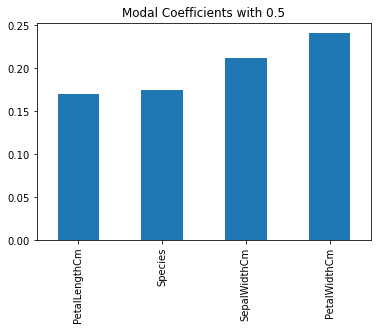

In [71]:
 # for alpha = 0.5
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

print("r2: ",r2_score(y_test,pred))

predictors = x_train.columns

coef = pd.Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 0.5')

r2:  0.40049434168920295


<AxesSubplot:title={'center':'Modal Coefficients with 5'}>

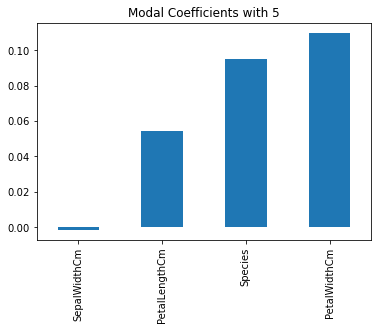

In [72]:
 # for alpha = 5
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_test)

print("r2: ",r2_score(y_test,pred))

predictors = x_train.columns

coef = pd.Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 5')

You can see that, as we increase the value of alpha, the magnitude of the coefficients decreases, where the values reaches to zero but not absolute zero.

But if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha=0.05. So we have to choose it wisely by iterating it through a range of values and using the one which gives us lowest error.

<li>It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
<li>It reduces the model complexity by coefficient shrinkage.
<li>It uses L2 regularization technique. (which I will discussed later in this article)

## Lasso/ L1 Regularization

r2:  0.8008193101169221
MSE:  0.13032835162805093


<AxesSubplot:title={'center':'Modal Coefficients with 0.05'}>

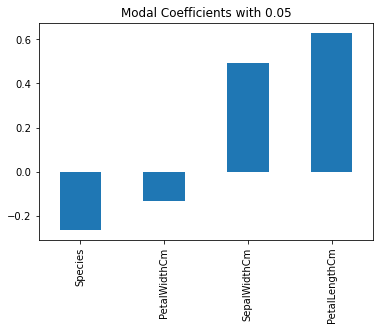

In [91]:
#for alpha = 0.001

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

print("r2: ",r2_score(y_test,pred))

print("MSE: ",np.mean((pred - y_test)**2))

lassoReg.score(x_test,y_test)

predictors = x_train.columns

coef = pd.Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 0.001')

r2:  0.7112406167459728
MSE:  0.18894168133829345


<AxesSubplot:title={'center':'Modal Coefficients with 0.01'}>

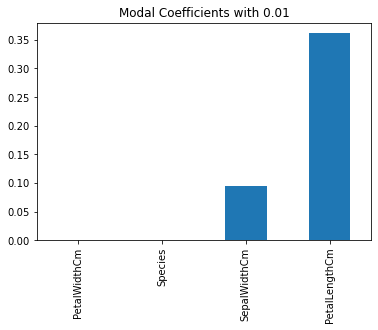

In [92]:
#for alpha = 0.01

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

print("r2: ",r2_score(y_test,pred))

print("MSE: ",np.mean((pred - y_test)**2))

lassoReg.score(x_test,y_test)

predictors = x_train.columns

coef = pd.Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 0.01')

r2:  -0.0009551868770059091
MSE:  0.6549472222222223


<AxesSubplot:title={'center':'Modal Coefficients with 0.1'}>

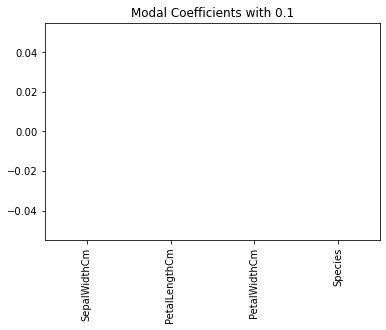

In [93]:
#for alpha = 0.1

from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

print("r2: ",r2_score(y_test,pred))

print("MSE: ",np.mean((pred - y_test)**2))

lassoReg.score(x_test,y_test)

predictors = x_train.columns

coef = pd.Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 0.1')

So, we can see that even at small values of alpha, the magnitude of coefficients have reduced a lot. By looking at the plots, can you figure a difference between ridge and lasso?

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

<li>It uses L1 regularization technique (will be discussed later in this article)
<li>It is generally used when we have more number of features, because it automatically does feature selection.

## Elastic Net Regression

r2:  0.7836883266883578
MSE:  0.1415375347738812


<AxesSubplot:title={'center':'Modal Coefficients with 0.05'}>

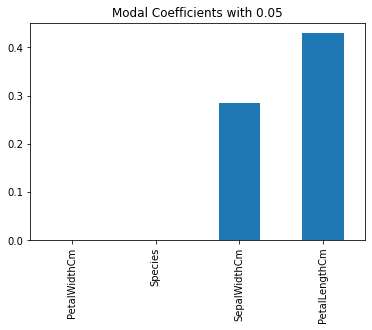

In [104]:
# with alpha = 0.05
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.05, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred = ENreg.predict(x_test)

#calculating mse

print("r2: ",r2_score(y_test,pred))

print("MSE: ",np.mean((pred - y_test)**2))

ENreg.score(x_test,y_test)

predictors = x_train.columns

coef = pd.Series(ENreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 0.05')

r2:  0.6517065959345902
MSE:  0.2278961141334213


<AxesSubplot:title={'center':'Modal Coefficients with 0.5'}>

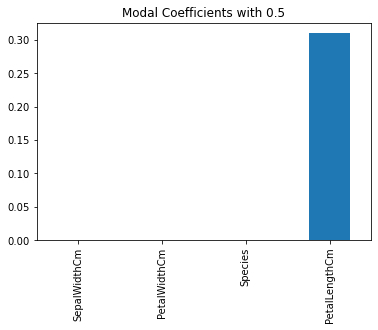

In [105]:
# with alpha = 0.5
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.5, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred = ENreg.predict(x_test)

#calculating mse

print("r2: ",r2_score(y_test,pred))

print("MSE: ",np.mean((pred - y_test)**2))

ENreg.score(x_test,y_test)

predictors = x_train.columns

coef = pd.Series(ENreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 0.5')

r2:  -0.0009551868770059091
MSE:  0.6549472222222223


<AxesSubplot:title={'center':'Modal Coefficients with 5'}>

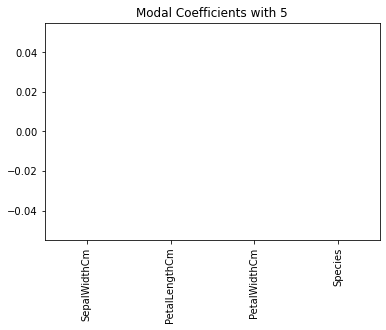

In [99]:
# with alpha = 5
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=5, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred = ENreg.predict(x_test)

#calculating mse

print("r2: ",r2_score(y_test,pred))

print("MSE: ",np.mean((pred - y_test)**2))

ENreg.score(x_test,y_test)

predictors = x_train.columns

coef = pd.Series(ENreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients with 5')

### Imp for Elastic Net
Elastic regression works in a similar way. Let’ say, we have a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consisting of these correlated variables. Now if any one of the variable of this group is a strong predictor (meaning having a strong relationship with dependent variable), then we will include the entire group in the model building, because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation ability, leading to a poor model performance.

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/